In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,8)
matplotlib.rcParams['image.cmap'] ='gray'

In [37]:
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'CSRT', 'MOSSE']
tracker_type = tracker_types[1]

In [38]:
if tracker_type == "BOOSTING":
    tracker = cv.TrackerBoosting_create()
elif tracker_type == 'MIL':
    tracker = cv.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv.TrackerKCF_create()
elif tracker_type == 'TLD':
    tracker = cv.TrackerTLD_create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv.TrackerMedianFlow_create()
elif tracker_type == 'GOTURN':
    tracker = cv.TrackerGOTURN_create()
elif tracker_type == "CSRT":
    tracker = cv.TrackerCSRT_create()
elif tracker_type == "MOSSE":
    tracker = cv.TrackerMOSSE_create()
else:
    tracker = None
    print('Incorrect tracker name')
    print('Available trackers are:')
    for t in tracker_types:
        print(t)

In [39]:
video = cv.VideoCapture(DATA_PATH+"videos/hockey.mp4")

if not video.isOpened():
    print("Could not open Video")

ok, frame = video.read()
if not ok:
    print("Cannot read video file")

red = (0,0,255)
blue = (255,128,0)

In [40]:
# Define an initial bounding box
# Cycle
#bbox = (477, 254, 55, 152)

# ship
# bbox = (751, 146, 51, 78)

# Hockey
bbox = (129, 47, 74, 85)

# Face2
# bbox = (237, 145, 74, 88)

# meeting
# bbox = (627, 183, 208, 190)     #CSRT
# bbox = (652, 187, 118, 123)       #KCF

# surfing
# bbox = (97, 329, 118, 293)

# surf
# bbox = (548, 587, 52, 87)

# spinning
# bbox = (232, 218, 377, 377)       #RED
# bbox = (699, 208, 383, 391)         #BLUE

# Car
# bbox = (71, 457, 254, 188)

Text(0.5, 1.0, 'Tracking')

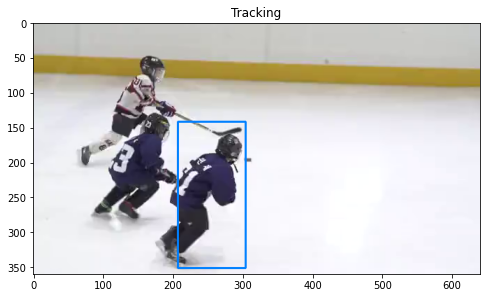

In [41]:
# Uncomment the line below to select a different bounding box
bbox = cv.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

# Display bounding box.
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
cv.rectangle(frame, p1, p2, blue, 2, 1 )

plt.imshow(frame[:,:,::-1])
plt.title("Tracking")

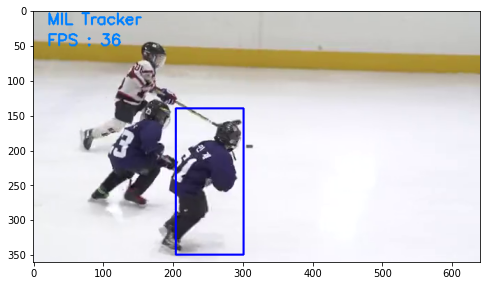

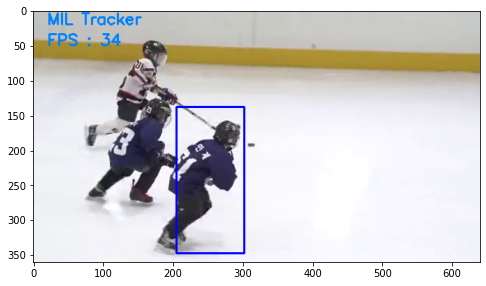

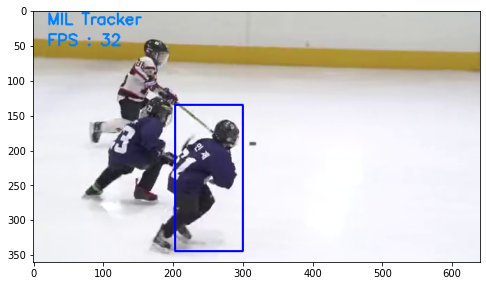

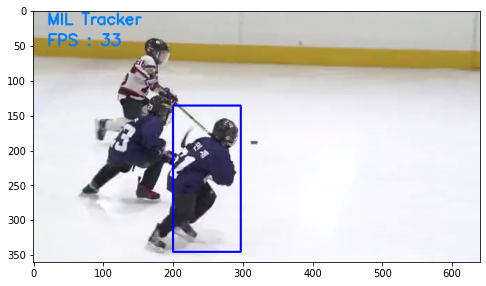

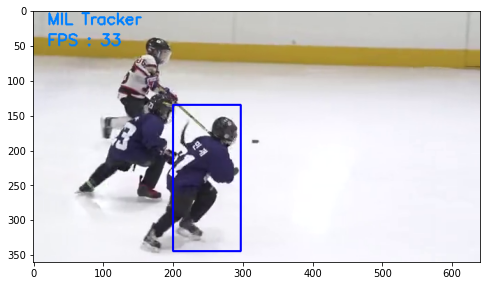

In [42]:
count = 0

while True:
    ok, frame = video.read()
    if not ok:
        break

    timer = cv.getTickCount()
    ok, bbox = tracker.update(frame)

    fps = cv.getTickFrequency()/(cv.getTickCount()-timer)

    if ok:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv.rectangle(frame, p1, p2, (255,0,0), 2, 1)
    else :
        # Tracking failure
        cv.putText(frame, "Tracking failure detected", (20,80),
                    cv.FONT_HERSHEY_SIMPLEX, 0.75,red,2)
    # Display tracker type on frame
    cv.putText(frame, tracker_type + " Tracker", (20,20),
                cv.FONT_HERSHEY_SIMPLEX, 0.75, blue,2);

    # Display FPS on frame
    cv.putText(frame, "FPS : " + str(int(fps)), (20,50),
                cv.FONT_HERSHEY_SIMPLEX, 0.75, blue, 2);

    # Display result
    plt.imshow(frame[:,:,::-1])
    plt.show()

    count += 1
    if count == 5:
        break